Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


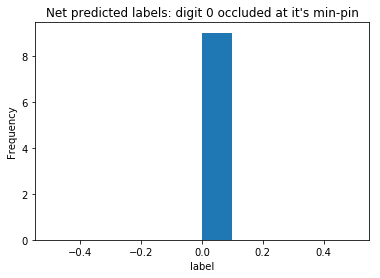

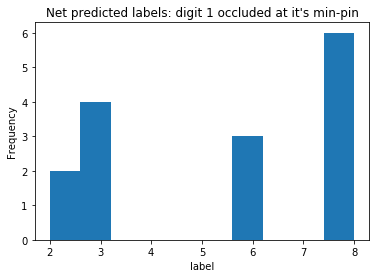

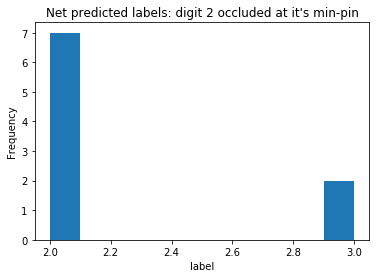

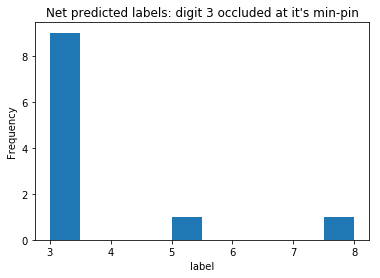

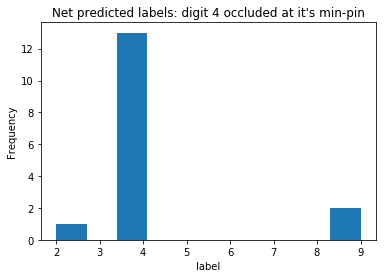

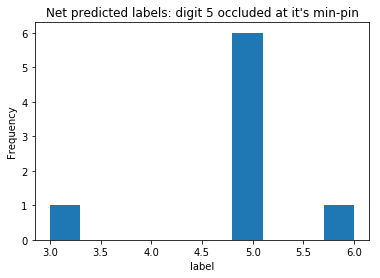

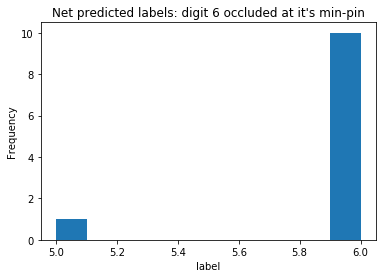

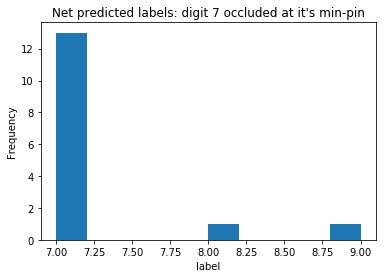

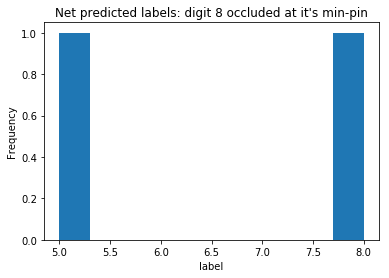

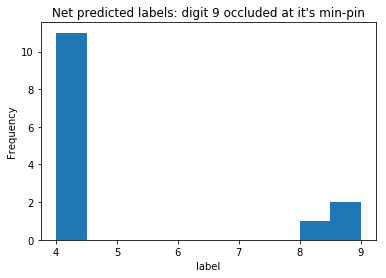

done!


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
from mnist_helper_functions import get_inds
import matplotlib.pyplot as plt
%matplotlib inline
import pickle


mnist0 = input_data.read_data_sets("MNIST_data/", one_hot=False)
N = 110
images       = mnist0.test.images[0:N]
images       = images.reshape((-1, 28, 28))
labels0      = mnist0.test.labels[0:N] #one_hot = False

inds_dict = get_inds(labels0)

pkl_file    = open('pred_labels.pkl', 'rb')
pred_labels = pickle.load(pkl_file)
pkl_file.close()

min_pins_arr = np.load('min_pins_arr.npy')
def draw_occ_images_and_hists(image, pred_labels, inds_dict, min_pins_arr):
    for d in range(10):
        inds         = inds_dict[d]
#         print("total number of %d's in test set: "%d)
#         print(len(inds))
#         occ_image    = images[inds].copy()[0]
        pin          = min_pins_arr[d]
#         print("min accuracy patch pins (i,j)-pixel indices on %d's:"%d)
#         print(pin)
        #perform occlusion
#         occ_image[pin[0,0]: pin[0,1], pin[1,0]: pin[1,1]] = 0
#         plt.imshow(occ_image)
#         plt.show()
        plt.hist(pred_labels[d], normed=False, bins=10)
        plt.title("Net predicted labels: digit %d occluded at it's min-pin"%d)
        plt.xlabel("label")
        plt.ylabel("Frequency")
        plt.show()
draw_occ_images_and_hists(images, pred_labels, inds_dict, min_pins_arr)

print("done!")